# Customer Segmentation in Practice 

- Using Grid Approach
- Applying Clustering Techniques like K-Means and K-Prototype

__CUSTOMER SEGMENTATION__ is the practice of dividing a __customer base__ into groups of individuals that are similar in specific ways relevant to marketing or customer management.
- There is no cure-all solution for customer segmentation.
- Depending on your goal and usage of the result from it, a variety of different approaches could be used for customer segmentation.

__(Simplified) Steps for Customer Segmentation__
- Define the goal of segmentation ... a
- Collect and prepare dataset to be used ... b
- Explore the dataset and customer traits ... c
- Select the approach to apply ... d
- Develop a set of rules or a model ... e
- Profile the resulting segments ... f
- Evaluate the segmentation based on the pre-defined goal ... g
- Describe(document) the results and insights from analysis in natural language ... h

### [1] Load Data
- __[step a and b]__
- The dataset is from a fictitious (=FAKE) __online retailer__ (let's call it **GetWhatEver.com**) which sells a variety of items in diffrenet categories. Assuming that we already finished a bit of preliminary processing to aggregate transactions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rjitt3(arr):
    stdev = .03*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

In [2]:
dfc50 = pd.read_csv(dataPath + 'dfc20bs.csv')

list_feat = ['custid','sex','age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_pstyr', 'cnt_pstyr']
dfc51 = dfc50[list_feat]
print(dfc51.shape)
dfc51.head()

(6000, 11)


,custid,sex,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_pstyr,cnt_pstyr
0,1,F,27,25100,0,20000,0,0,0,209321.0,4
1,2,F,28,21500,0,21700,0,0,0,188514.0,3
2,3,F,27,0,0,20200,0,0,0,206183.0,2
3,4,F,27,0,0,0,0,0,0,226851.0,2
4,5,F,27,20100,0,34000,0,0,0,221491.0,4


### [2] Explore
- __[step c]__
- Do some EDA to understand the data and the customer base of GetWhatEver.com.
- Based on the insight from exploration, select the approaches to be applied. 

In [3]:
# just use select categoies of interest for analysis in the initial stage

select_cols = ['amt_nike', 'amt_strbk', 'amt_book']
dfcc01 = dfc51[select_cols]
dfcc01.head()

,amt_nike,amt_strbk,amt_book
0,25100,20000,0
1,21500,21700,0
2,0,20200,0
3,0,0,0
4,20100,34000,0


amt_nike
amt_strbk
amt_book


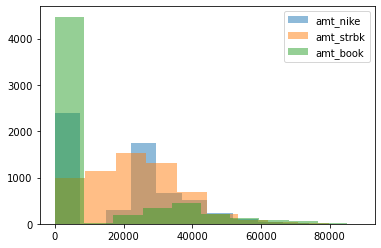

In [4]:
# compare distributions of categories

for x in range(len(select_cols)):
    print(select_cols[x])
    col = select_cols[x]
    plt.hist(dfcc01[col], alpha=0.5)
plt.legend(select_cols)
plt.show()    

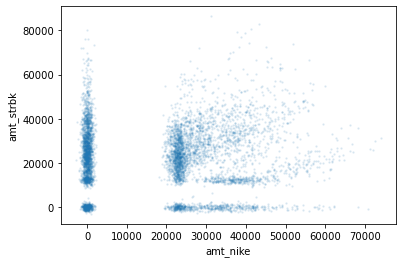

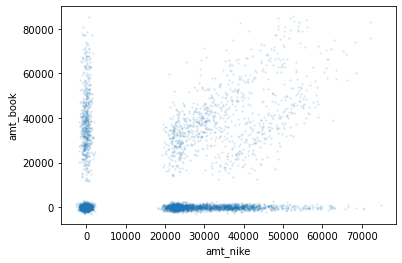

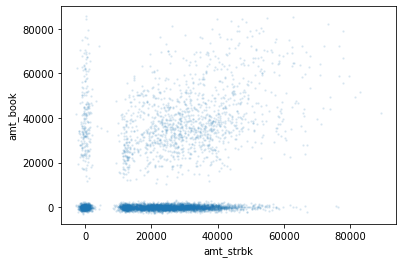

In [5]:
# Visual Analysis

from itertools import combinations

# create a list of combinations of size 2
output = sum([list(map(list, combinations(select_cols, i))) for i in range(3)],[])[4:]
output

for i in range(len(output)):
    plt.scatter(rjitt(dfcc01[output[i][0]]), rjitt(dfcc01[output[i][1]]),
                s=2, alpha=0.1)
    plt.xlabel(output[i][0])
    plt.ylabel(output[i][1])
    plt.show()

In [6]:
# just use select categoies of interest for analysis in the initial stage

select_cols = ['age', 'sex', 'amt_pstyr']
dfcc01 = dfc51[select_cols]
dfcc01.head()

,age,sex,amt_pstyr
0,27,F,209321.0
1,28,F,188514.0
2,27,F,206183.0
3,27,F,226851.0
4,27,F,221491.0


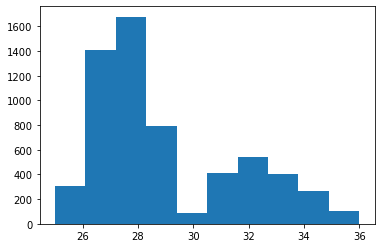

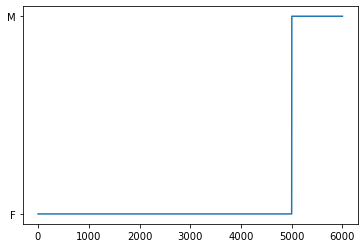

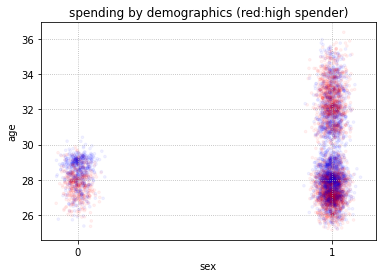

In [7]:
plt.hist(dfcc01.age)
plt.show()

plt.plot(dfcc01.sex)
plt.show()

from matplotlib.pyplot import xticks

# create a scatterplot
dfsct = dfcc01.copy()
dfsct['is_female'] = np.where(dfsct.sex=='F', 1, 0)

clrs = ['red' if x>dfsct.amt_pstyr.median() else 'blue' for x in dfsct.amt_pstyr]
plt.scatter(rjitt3(dfsct.is_female), rjitt3(dfsct.age), 
            s=7, alpha=0.05, color=clrs)
locs, labels = xticks()
plt.xticks(np.arange(0, 2, step=1))
plt.xlabel('sex')
plt.ylabel('age')
plt.title('spending by demographics (red:high spender)')
plt.grid(linestyle=':')
plt.show()

### [3] Select Approaches
- __[step d]__
- Decided to use grid based[1] and cluster based[2] solutions

### [4.1] Grid-based Segmenation
- Starbucks and Nike are the two most popular categories

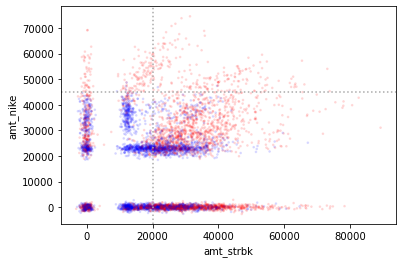

In [8]:
select_cols = ['amt_strbk', 'amt_nike', 'amt_pstyr']
dfcc01 = dfc51[select_cols]

clrs = ['red' if x>dfcc01.amt_pstyr.median() else 'blue' for x in dfcc01.amt_pstyr]
plt.scatter(rjitt(dfcc01.amt_strbk), rjitt(dfcc01.amt_nike),
                s=3, alpha=0.1, color=clrs)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nike')
plt.axvline(20000, color='darkgrey', linestyle=':')
plt.axhline(45000, color='darkgrey', linestyle=':')
plt.show()

- Produced three distinctive groups i.e. { (amt_nike>=45000), (amt_nike<45000 & amt_strbk>=20000), (amt_nike<45000 & amt_strbk<20000)}

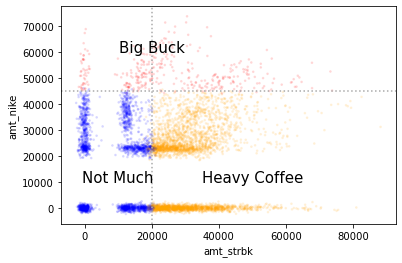

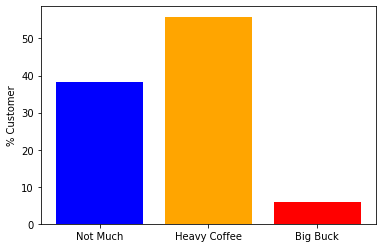

In [9]:
clrs =  np.where(dfcc01.amt_nike>=0,'red','blue')
clrs =  np.where((dfcc01.amt_nike<45000) & (dfcc01.amt_strbk>=20000),'orange',clrs)
clrs =  np.where((dfcc01.amt_nike<45000) & (dfcc01.amt_strbk<20000),'blue',clrs)
                 
plt.scatter(rjitt(dfcc01.amt_strbk), rjitt(dfcc01.amt_nike),
                s=3, alpha=0.1, color=clrs)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nike')
plt.axvline(20000, color='darkgrey', linestyle=':')
plt.axhline(45000, color='darkgrey', linestyle=':')
# Naming Segments
plt.text(20000,60000,'Big Buck', horizontalalignment='center', fontsize=15)
plt.text(50000,10000,'Heavy Coffee', horizontalalignment='center', fontsize=15)
plt.text(10000,10000,'Not Much', horizontalalignment='center', fontsize=15)
plt.show()


seg_lbl, frqs = np.unique(clrs, return_counts=True)
plt.bar(['Not Much','Heavy Coffee','Big Buck' ], frqs*100/sum(frqs), color=seg_lbl)
plt.ylabel('% Customer')
plt.show()

### [4.2] K-Means Clustering

In [10]:
select_cols = ['age', 'sex','amt_nike', 'amt_strbk', 'amt_book', 'amt_pstyr']
# 한번 돌려보고 나니 총액은 들어가지 않는 것이 더 바람직하다고 판단한 경우라면
# 금액 변수는 버리고 나머지로만 클러스터링과 프로파일링 다시 진행
# select_cols = ['age', 'sex','amt_nike', 'amt_strbk', 'amt_book']

dfcc01 = dfc51[select_cols]
dfcc01['is_female'] = np.where(dfcc01.sex=='F', 1, 0)
dfcc02 = dfcc01.copy().drop('sex', axis=1)
dfcc02.head()

,age,amt_nike,amt_strbk,amt_book,amt_pstyr,is_female
0,27,25100,20000,0,209321.0,1
1,28,21500,21700,0,188514.0,1
2,27,0,20200,0,206183.0,1
3,27,0,0,0,226851.0,1
4,27,20100,34000,0,221491.0,1


unique_labels {0, 1, 2}


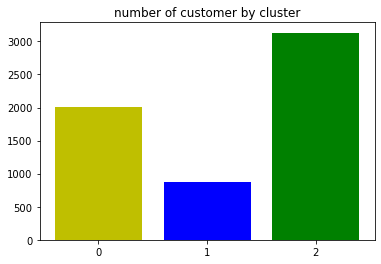

cluster profile - mean value


,clst,age,amt_nike,amt_strbk,amt_book,amt_pstyr,is_female
0,0,29.311189,18548.951049,25380.369630,15234.265734,279800.401512,0.894106
1,1,28.595156,27669.665513,31469.665513,28096.885813,404464.277293,0.727797
2,2,29.125838,15935.962951,18337.432130,1781.539444,204610.531639,0.823698


In [11]:
from sklearn.cluster import KMeans  

df4kmm = dfcc02.copy()

# create k-means model
kmm1 = KMeans(n_clusters=3, random_state=111)  
# set seed using random_state option
kmm1.fit(df4kmm)  

# count the number of customer in each group
clst_label, clst_cust_counts = np.unique(kmm1.labels_, return_counts=True)

# define vectors representing cluster
unique_labels = set(clst_label) 
print('unique_labels', unique_labels)
colors = ['y', 'b', 'g', 'r', 'grey', 'pink'] 
colors = colors[:len(unique_labels)+1].copy()
colors3 = colors

plt.bar(clst_label.astype(str), clst_cust_counts, color=colors3) 
plt.title('number of customer by cluster')
plt.show()

X1 = dfcc01.copy()
X1['clst'] = kmm1.labels_
print('cluster profile - mean value')
df_clstprfl = X1.groupby('clst').mean().reset_index() 
df_clstprfl

   clst       age  amt_nike  amt_strbk  amt_book  amt_pstyr  is_female
0     0  1.000000  0.670371   0.806503  0.542205    0.69178   1.000000
1     1  0.975571  1.000000   1.000000  1.000000    1.00000   0.813994
2     2  0.993676  0.575936   0.582702  0.063407    0.50588   0.921254


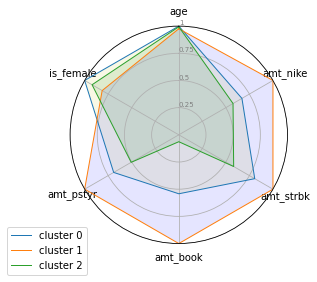

==> Notice that we have more than three dimensions used. That is why we had to introduce radar chart.


In [12]:
from math import pi
 
# Set data
df = df_clstprfl.copy()
prfl_cols =df.columns[1:]
for x in range(len(prfl_cols)): 
    df[prfl_cols[x]] =  df[prfl_cols[x]]/df[prfl_cols[x]].max()
print(df)    
    
 
#------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75,1], ["0.25","0.5","0.75","1"], color="grey", size=7)
plt.ylim(0,1)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('clst').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 0")
ax.fill(angles, values, colors[0], alpha=0.1)
 
# Ind2
values=df.loc[1].drop('clst').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 1")
ax.fill(angles, values, colors[1], alpha=0.1)
 

# Ind3
values=df.loc[2].drop('clst').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 2")
ax.fill(angles, values, colors[2], alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

print('==> Notice that we have more than three dimensions used. That is why we had to introduce radar chart.')

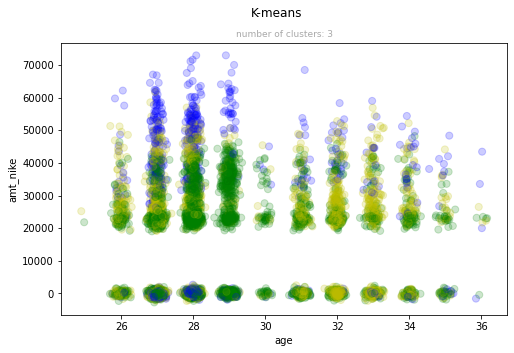

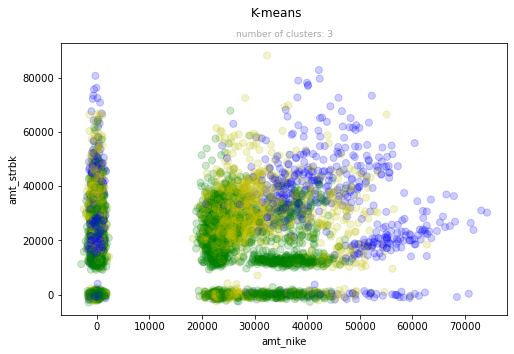

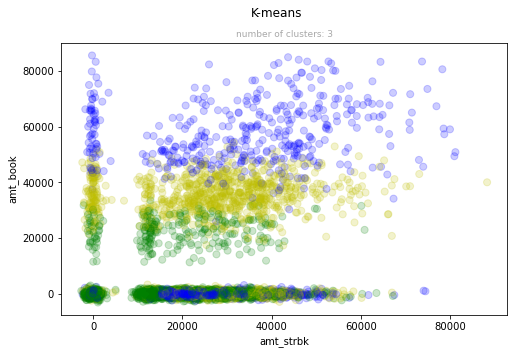

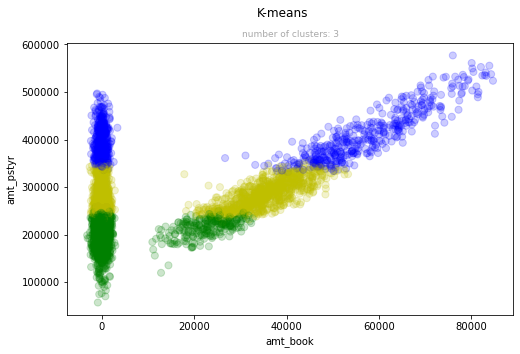

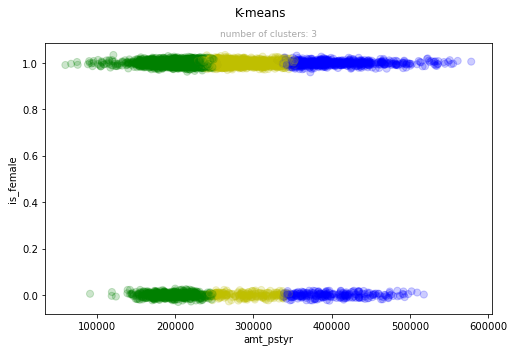

In [13]:
mdl_cols = df4kmm.columns

# assign color of the segment for each customer
colors4 = [colors[x] for x in  kmm1.labels_] 

for j in range(len(select_cols)-1):
    plt.figure(figsize=(8,5))
    plt.scatter(rjitt(df4kmm[mdl_cols[j]]), rjitt(df4kmm[mdl_cols[j+1]]),
       color = colors4, s=50, alpha=0.2)

    # instead of adding subtitle, make suptitle as title
    plt.suptitle("K-means")
    n_clusters_ = 3
    plt.title('number of clusters: %d' %n_clusters_, fontsize=9, color='darkgrey')

    plt.xlabel(mdl_cols[j])
    plt.ylabel(mdl_cols[j+1])

    plt.show()
    
   

#### [Post Segmentation Analysis] What determined the segmentation result?

list of input features :  ['age', 'amt_nike', 'amt_strbk', 'amt_book', 'amt_pstyr', 'is_female']


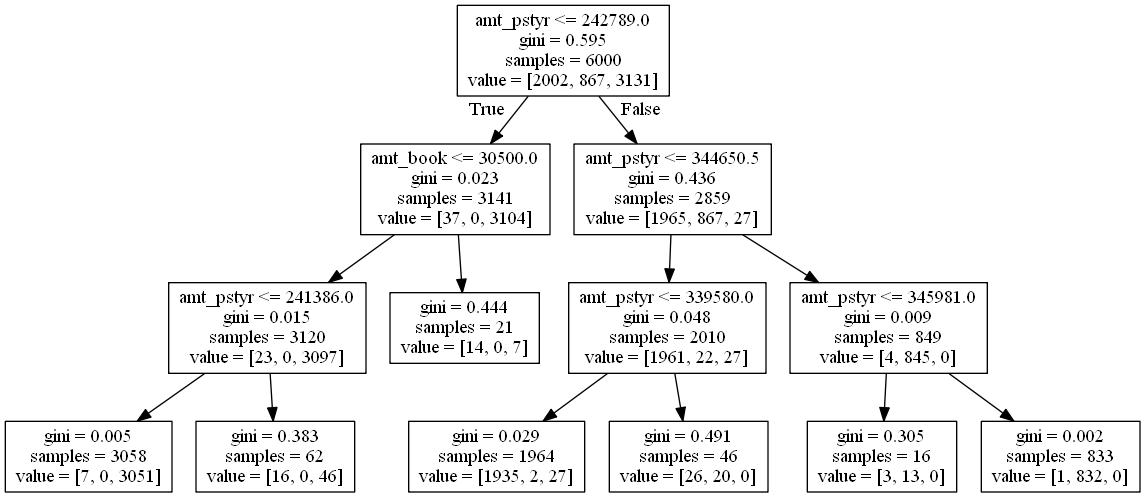

In [14]:
from sklearn.tree import DecisionTreeClassifier


# define target and features to use
dtfeatures = list(df4kmm.columns)
print('list of input features : ', dtfeatures)
tgt = X1.clst

dfdt = df4kmm.copy()

dt1 = DecisionTreeClassifier(min_samples_split=30, 
                            max_depth=3, 
                            min_samples_leaf=10, 
                            random_state=99)
dt1.fit(dfdt[dtfeatures], tgt)

# --- to display tree plot
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# ['y', 'b', 'g']

__'amt_pstyr'__ is the total spending icluding all the categories. Then, is this segmentation okay for your goal and actions to take based on the result?
- If not, what would you adjust?
- Re-scaling before clustering is an alternative?

### <font color=blue>K-Prototype Algorithm for Clustering Mixed attributes</font>
- combining k-means and k-modes
- k-modes clustering for categorical data. The mode of a set of data values is the value that appears most often.

In [16]:
#  https://medium.com/datadriveninvestor/k-prototype-in-clustering-mixed-attributes-e6907db91914

from kmodes.kprototypes import KPrototypes

# load data
dfc51 = pd.read_csv(dataPath + 'dfc20bs.csv')
list_feat = ['sex','education', 'area', 'age', 'amt_food', 'amt_beauty','amt_strbk', 'amt_book', 'amt_nike', 'amt_prmmsneakers']
dfc51 = dfc51[list_feat]
print(dfc51.head())


kproto = KPrototypes(n_clusters=3, init='Cao', verbose=0)
dfdtkprt = dfc51
X = np.array(dfdtkprt)
clusters = kproto.fit_predict(X, categorical=[0, 1, 2])
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)


dfdtkprt['clst'] = clusters
dfdtkprt.head()



  sex   education  area  age      amt_food  amt_beauty  amt_strbk  amt_book  \
0   F  university  SEOL   27    182.744231       24400      20000         0   
1   F  university  SEOL   28  43507.134000       23500      21700         0   
2   F  university  SEOL   27    194.922917       25200      20200         0   
3   F     college  SEOL   27    121.457143       27000          0         0   
4   F  university  SEOL   27    267.888462       24600      34000         0   

   amt_nike  amt_prmmsneakers  
0     25100                 0  
1     21500                 0  
2         0                 0  
3         0                 0  
4     20100             76700  
[array([[2.92269939e+01, 2.87438826e+04, 1.75398773e+04, 2.30599182e+04,
        9.23415133e+03, 1.92104294e+04, 9.73844581e+04],
       [2.72260951e+01, 2.36355045e+02, 3.40332077e+04, 2.43104098e+04,
        1.49189826e+04, 1.90933585e+04, 0.00000000e+00],
       [3.04522249e+01, 4.97373464e+04, 5.50689893e+03, 2.11612970e+04,
  

,sex,education,area,age,amt_food,amt_beauty,amt_strbk,amt_book,amt_nike,amt_prmmsneakers,clst
0,F,university,SEOL,27,182.744231,24400,20000,0,25100,0,1
1,F,university,SEOL,28,43507.134000,23500,21700,0,21500,0,2
2,F,university,SEOL,27,194.922917,25200,20200,0,0,0,1
3,F,college,SEOL,27,121.457143,27000,0,0,0,0,1
4,F,university,SEOL,27,267.888462,24600,34000,0,20100,76700,0


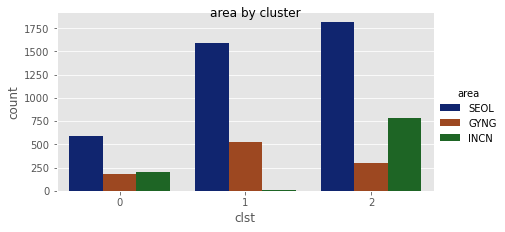

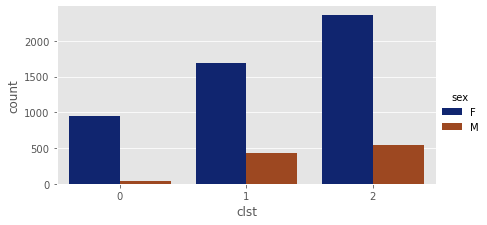

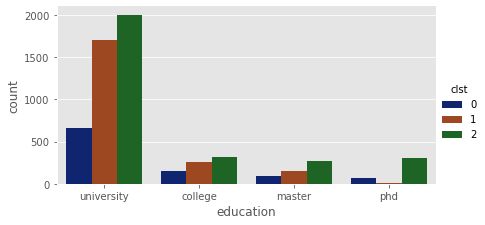

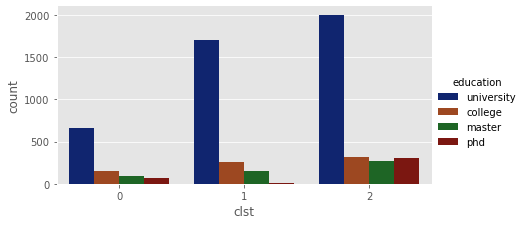

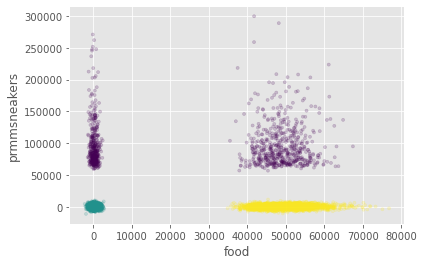

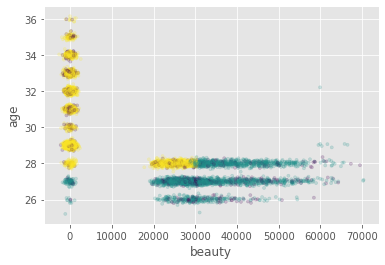

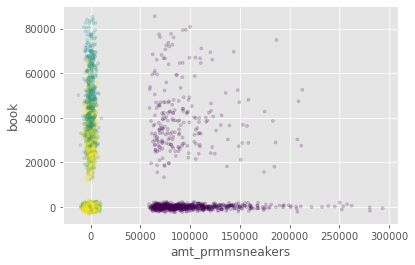

In [18]:
import seaborn as sns

ax = sns.catplot(x='clst', kind='count', hue = 'area', data=dfdtkprt,
                 height=3,aspect=2,
                palette='dark')
ax.fig.suptitle('area by cluster', color='black')
plt.show()


style.use('ggplot')
#  show the relationship between a numerical and one or more categorical variables
sns.catplot(x='clst', kind='count',hue = 'sex', palette='dark', 
            height=3, aspect=2,
            data=dfdtkprt)
plt.show()

sns.catplot(x='education', kind='count',hue = 'clst', palette='dark', 
            data=dfdtkprt,
           height=3,aspect=2,)
plt.show()

sns.catplot(x='clst', kind='count',hue = 'education', palette='dark', 
            data=dfdtkprt, height=3, aspect=2)
plt.show()


plt.figure(figsize=(6,4))
plt.scatter(rjitt(dfdtkprt.amt_food), rjitt(dfdtkprt.amt_prmmsneakers),
           s=10, alpha=0.2, c=dfdtkprt.clst)
plt.xlabel('food')
plt.ylabel('prmmsneakers')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(rjitt(dfdtkprt.amt_beauty), rjitt(dfdtkprt.age),
           s=10, alpha=0.2, c=dfdtkprt.clst)
plt.xlabel('beauty')
plt.ylabel('age')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(rjitt(dfdtkprt.amt_prmmsneakers), rjitt(dfdtkprt.amt_book),
           s=10, alpha=0.2, c=dfdtkprt.clst)
plt.xlabel('amt_prmmsneakers')
plt.ylabel('book')
plt.show()


Learning rate set to 0.239796
0:	learn: 0.9918333	total: 91.5ms	remaining: 27.4s
50:	learn: 1.0000000	total: 2.24s	remaining: 10.9s
100:	learn: 1.0000000	total: 4.29s	remaining: 8.45s
150:	learn: 1.0000000	total: 6.31s	remaining: 6.23s
200:	learn: 1.0000000	total: 8.3s	remaining: 4.09s
250:	learn: 1.0000000	total: 10.5s	remaining: 2.04s
299:	learn: 1.0000000	total: 12.5s	remaining: 0us


<Figure size 432x288 with 0 Axes>

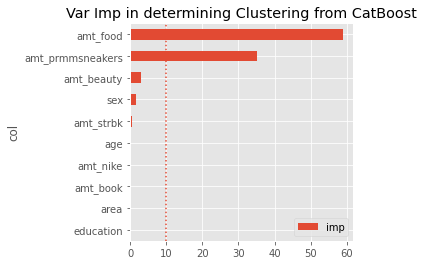

,imp,col,cum_sum_imp
4,58.87,amt_food,58.87
9,35.10,amt_prmmsneakers,93.97
5,2.98,amt_beauty,96.95
0,1.61,sex,98.56
6,0.50,amt_strbk,99.06
3,0.35,age,99.41
8,0.30,amt_nike,99.71
7,0.24,amt_book,99.95
2,0.06,area,100.01
1,0.00,education,100.01


In [19]:
# understanding key determinants of clustering

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

list_feat = ['sex','education', 'area', 'age', 'amt_food', 'amt_beauty','amt_strbk', 'amt_book', 'amt_nike', 'amt_prmmsneakers']
dfdt = dfc50[list_feat].copy()
tgt = dfdtkprt['clst']

categorical_features_indices = np.where(dfdt.dtypes ==np.object)[0]

cbmodel = CatBoostClassifier(iterations=300, eval_metric='Accuracy', 
                             random_seed=9, 
                             loss_function='MultiClass', # ['Logloss', 'MultiClass']
                             metric_period = 50)
            
cbmodel.fit(dfdt, tgt, cat_features=categorical_features_indices)


# Mapping Feature Importance of Mixted Type CatBoost

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': dfdt.columns})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in determining Clustering from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

### [Interpretation] What does this clustered pattern mean?
- What does this analysis mean to the company?
- What kind of actions would you recommend to take to the company?

- __Categorical variables__ and numeric variables are used together in  __K-Prototype Algorithm__. 
- K-Means algorithm which is used more often does not use categorical variables. 
- Applying __encoding__ methods to transform categorical variables to numeric ones are available options. (c.f. Feature ecoding methods in feature engineering while building supervised learning models)

**[THINGS TO REMBER]**
- Clustering might be used for **EDA** to identify the structural composition
- Often times clustering is used for building models to __segment or recommend items__
- __Accuracy__ means no big deal when it comes to clustering. Setting the right way to evaluate clustering result is just up to you. Double check your pre-defined goal of segmentation.